In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Steps Followed:1
1. Removed the Duplicate records and keept only First occurance
2. Dropped unwanted Columns and checked the shape after Dropping
3. Coverted True/False colum to 1/0 Respectively (OHE) in 5 features using userDefine Function.
4. Removed comma from all 3 prices (product_original_price,product_price,product_minimum_offer_price)
5. Removed $ symbol and coverted to Indian Currency for all 3 prices (product_original_price,product_price,product_minimum_offer_price)
7. Converted sales_volum to normal integer values (removed text and special chaar and)
8. Extracted Brand Name from Title
9. Extracted RAM Size from Title
10. Replaced GB with space
11. Replaced nan with mean and rounded to nearest valid value with is 64

In [8]:
phones = pd.read_csv('phone search.csv')

In [10]:
#1. Removed the Duplicate records and keept only First occurance
phones=phones.drop_duplicates(keep='first')
# phones.keys()

In [12]:
# 2. Dropped unwanted Columns and checked the shape after Dropping
# phones = phones.drop(['asin','currency','product_url','product_photo','product_availability','delivery','unit_price','unit_count','coupon_text'], axis=1)
# print(phones.shape)
# phones.info()

(319, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 339
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_title                319 non-null    object 
 1   product_price                315 non-null    object 
 2   product_original_price       139 non-null    object 
 3   product_star_rating          316 non-null    float64
 4   product_num_ratings          319 non-null    int64  
 5   product_num_offers           319 non-null    int64  
 6   product_minimum_offer_price  315 non-null    object 
 7   is_best_seller               319 non-null    bool   
 8   is_amazon_choice             319 non-null    bool   
 9   is_prime                     319 non-null    bool   
 10  climate_pledge_friendly      319 non-null    bool   
 11  sales_volume                 299 non-null    object 
 12  has_variations               319 non-null    bool   
dtypes: bool(5), flo

In [632]:
# phones.sample(50)

In [14]:
def replace_boolean_with_int(phones, columns):
    for column in columns:
        if column in phones.columns:
            phones[column] = phones[column].replace({True: 1, False: 0})
    return phones
phones = replace_boolean_with_int(phones, ['is_best_seller', 'is_amazon_choice','is_prime','climate_pledge_friendly','has_variations'])

In [638]:
# phones.sample(50)

In [16]:
phones['product_price']=phones['product_price'].str.replace(',','')
phones['product_original_price']=phones['product_original_price'].str.replace(',','')
phones['product_minimum_offer_price']=phones['product_minimum_offer_price'].str.replace(',','')

In [18]:
def process_product_minimum_offer_price(df, column_name):
    if column_name in phones.columns:
        # Remove the '$' symbol and convert to numeric
        phones[column_name] = phones[column_name].replace({'\$': ''}, regex=True).astype(float)
        # Multiply each value by 84
        phones[column_name] = phones[column_name] * 84
    return phones
phones = process_product_minimum_offer_price(phones, 'product_minimum_offer_price')

In [20]:
def process_product_price(df, column_name):
    if column_name in phones.columns:
        # Remove the '$' symbol and convert to numeric
        phones[column_name] = phones[column_name].replace({'\$': ''}, regex=True).astype(float)
        # Multiply each value by 84
        phones[column_name] = phones[column_name] * 84
    return phones
phones = process_product_price(phones, 'product_price')

In [22]:
def process_product_original_price(df, column_name):
    if column_name in phones.columns:
        # Remove the '$' symbol and convert to numeric
        phones[column_name] = phones[column_name].replace({'\$': ''}, regex=True).astype(float)
        # Multiply each value by 84
        phones[column_name] = phones[column_name] * 84
    return phones
phones = process_product_original_price(phones, 'product_original_price')

In [24]:
def process_sales_volume(text):
    try:
        if isinstance(text, str):
            text = text.lower().replace('+ bought in past month', '').strip()
            if 'k' in text:
                return float(text.replace('k', '')) * 1000
            elif 'nan' in text or text == 'nan':
                return np.nan
            else:
                return float(text)
        return np.nan
    except ValueError:
        print(f"Could not convert value: {text}")
        return np.nan
phones['sales_volume']= phones['sales_volume'].apply(process_sales_volume)

Could not convert value: list:
Could not convert value: list:
Could not convert value: more buying choices
Could not convert value: more buying choices
Could not convert value: more buying choices
Could not convert value: list:
Could not convert value: typical:
Could not convert value: typical:
Could not convert value: list:
Could not convert value: typical price:
Could not convert value: more buying choices
Could not convert value: more buying choices
Could not convert value: more buying choices
Could not convert value: typical price:
Could not convert value: list:
Could not convert value: more buying choices
Could not convert value: more buying choices
Could not convert value: typical price:
Could not convert value: list:
Could not convert value: more buying choices
Could not convert value: more buying choices
Could not convert value: more buying choices
Could not convert value: more buying choices
Could not convert value: typical:
Could not convert value: more buying choices


In [674]:
phones

,product_title,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,has_variations
0,Moto G Play 2023 3-Day Battery Unlocked Made f...,698544.00,1199449.44,4.0,1319,16,493073.28,0,0,1,0,NaN,0
1,"Samsung Galaxy A15 (SM-155M/DSN), 128GB 6GB RA...",1086553.44,NaN,4.2,186,4,1040760.00,0,0,1,0,NaN,0
2,"Samsung Galaxy A03s Cell Phone, AT&amp;T GSM U...",486864.00,705529.44,3.8,597,35,458569.44,0,0,1,0,NaN,1
3,TracFone | Motorola Moto g Pure | Locked | 32G...,352729.44,NaN,4.2,2814,3,310393.44,0,0,1,0,NaN,0
4,"Samsung Galaxy A13 5G Cell Phone, AT&amp;T GSM...",621563.04,693393.12,3.8,1338,31,496742.40,0,0,1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,"Gimbal Stabilizer for Smartphone, 3-Axis Phone...",705529.44,NaN,4.7,8,1,705529.44,0,0,1,0,NaN,0
336,[True Military-Grade] Car Phone Holder【2024 St...,282169.44,324505.44,4.4,2589,1,282169.44,0,0,1,0,NaN,0
337,Wall Mount Cell Phone Charging Shelf | Multi-D...,1926288.00,NaN,4.1,45,1,1926288.00,0,0,0,0,NaN,0
338,"Sensyne 92&quot; Cell Phone Tripod, Selfie Sti...",211609.44,NaN,4.6,29066,1,211609.44,1,0,1,0,NaN,0


In [249]:
# phones.isnull().sum()

In [26]:
phone_brands = ['Motorola','Samsung','Moto','Panasonic','OnePlus','VTech','Apple','Alcatel','Bold','AT&T','Nokia',
                'BLU','Sensyne','A23','AGM','Blackview','CAT','CMF','Corded','CUBOT','DOOGEE','Gabb','Google',
                'Hamilton','HelloBaby','K60','Kyocera','LIVELY','NUU','OUKITEL','Reno','Sangyn','Sensyne','TCL','Total',
                'Tracfone','UMIDIGI','VTech','Xiaomi','XL88Q','Y043','Yealink','ZTE']
# Function to extract brand names from product titles
def extract_brand(title):
    for brand in phone_brands:
        if brand.lower() in title.lower():
            return brand  
    return None
phones['brand_name'] = phones['product_title'].apply(extract_brand)
# phones

In [255]:
# sns.lmplot(x='sales_volume', y='product_price', data=phones, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
# plt.title('Correlation between sales_volume and product_minimum_offer_price')
# plt.xlabel('sales_volume')
# plt.ylabel('product_minimum_offer_price')
# plt.show()

In [28]:
#9. Extracted RAM Size from Title
phone_ram_size = ['16GB','32GB','64GB','128GB','256GB','512GB']
# Function to extract Ram Size from product titles
def extract_brand(title):
    for ram in phone_ram_size:
        if ram.lower() in title.lower():
            return ram  
    return 0
phones['Phone_Ram_Size'] = phones['product_title'].apply(extract_brand)
# phones

In [30]:
def replace_common_characters(df, column_name, characters_to_replace, replacement=""):
    if column_name in phones.columns:
        # Replace specified characters using regex
        df[column_name] = df[column_name].replace(characters_to_replace, replacement, regex=True)
    else:
        print(f"Column '{column_name}' not found in DataFrame.")
    return df
phones = replace_common_characters(phones, 'Phone_Ram_Size', "GB", "")
phones['Phone_Ram_Size']=phones['Phone_Ram_Size'].astype('int32')
# phones

In [34]:
phonesDF=phones.drop(columns=['product_title'], axis=1)

#### Missing Imputation

In [138]:
def mean_without_outliers_of_product_price(df, column_name):
    if column_name in df.columns:
        # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers
        filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        # Calculate the mean of the column without outliers
        mean_value = filtered_df[column_name].mean()
        return mean_value
    else:
        print(f"Column '{column_name}' not found in DataFrame.")
        return None  # Return None if column doesn't exist
   
product_price_mean = mean_without_outliers_of_product_price(phonesDF, 'product_price').round(2)
product_minimum_offer_price_mean = mean_without_outliers_of_product_price(phonesDF, 'product_minimum_offer_price').round(2)
product_star_rating_mean = mean_without_outliers_of_product_price(phonesDF, 'product_star_rating').round(2)
product_original_price_mean = mean_without_outliers_of_product_price(phonesDF, 'product_original_price').round(2)
sales_volume_mean = mean_without_outliers_of_product_price(phonesDF, 'sales_volume').round(2)
phone_Ram_Size_mean = mean_without_outliers_of_product_price(phonesDF, 'Phone_Ram_Size').round(2)

phone_Ram_Size_mean=64
print("Without OutLier | with Outlier")
print(product_price_mean, "|" ,phonesDF['product_price'].mean().round(2))
print(product_minimum_offer_price_mean, "|" , phonesDF['product_minimum_offer_price'].mean().round(2))
print(product_star_rating_mean, "|" , phonesDF['product_star_rating'].mean().round(2))
print(product_original_price_mean, "|" , phonesDF['product_original_price'].mean().round(2))
print(phone_Ram_Size_mean, "|" , phonesDF['Phone_Ram_Size'].mean().round(2))

Without OutLier | with Outlier
10578.24 | 14531.68
8490.96 | 12381.02
4.11 | 4.08
14996.74 | 17380.04
64 | 101.52


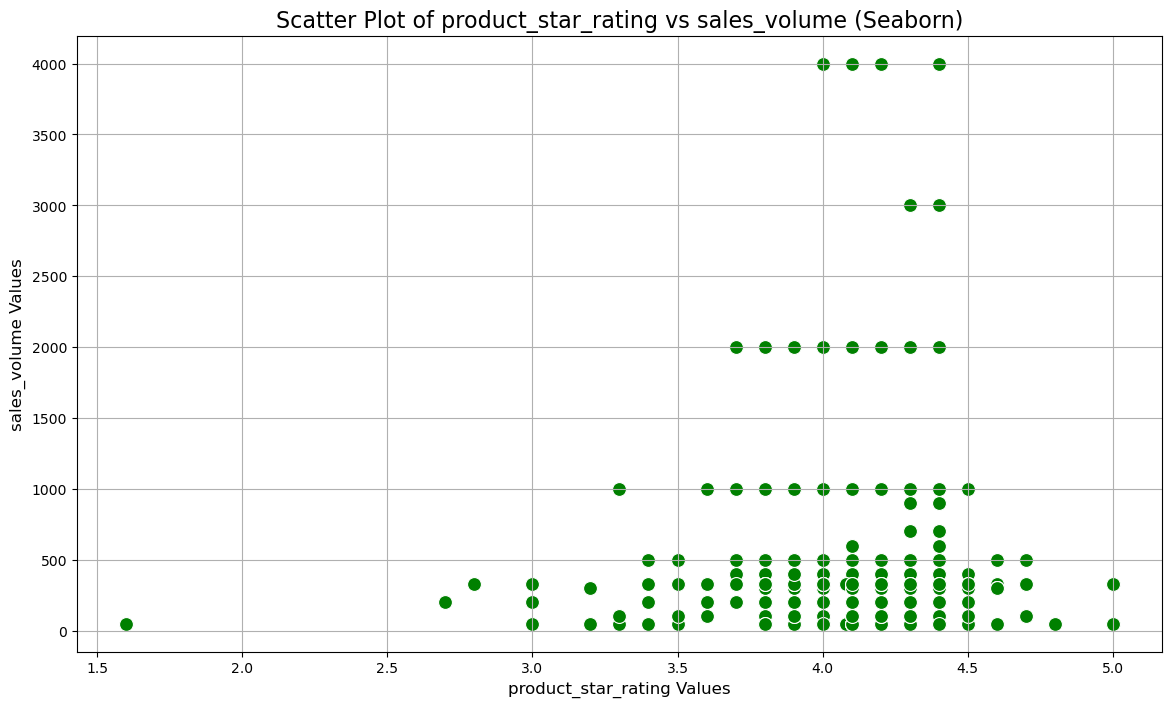

In [164]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x="product_star_rating", y="sales_volume", data=phonesDF, color="green", s=100)
plt.title("Scatter Plot of product_star_rating vs sales_volume (Seaborn)", fontsize=16)
plt.xlabel("product_star_rating Values", fontsize=12)
plt.ylabel("sales_volume Values", fontsize=12)
plt.grid(True)
plt.show()

In [38]:
phonesDF['product_price'] = phonesDF['product_price'].fillna(product_price_mean)
phonesDF['product_minimum_offer_price'] = phonesDF['product_minimum_offer_price'].fillna(product_minimum_offer_price_mean)
phonesDF['product_star_rating'] = phonesDF['product_star_rating'].fillna(phonesDF['product_star_rating'].mean().round(2))
phonesDF['product_original_price'] = phonesDF['product_original_price'].fillna(product_original_price_mean)
phonesDF['sales_volume'] = phonesDF['sales_volume'].fillna(sales_volume_mean)
phonesDF['Phone_Ram_Size'] = phonesDF['Phone_Ram_Size'].replace(0, phone_Ram_Size_mean)

In [40]:
phonesDF.isnull().sum()

product_price                   0
product_original_price          0
product_star_rating             0
product_num_ratings             0
product_num_offers              0
product_minimum_offer_price     0
is_best_seller                  0
is_amazon_choice                0
is_prime                        0
climate_pledge_friendly         0
sales_volume                    0
has_variations                  0
brand_name                     36
Phone_Ram_Size                  0
dtype: int64

In [42]:
phonesDF.sample(50)

,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,has_variations,brand_name,Phone_Ram_Size
163,5539.80,15068.85,4.3,26175,3,2961.00,0,0,1,0,300.00,0,VTech,64
317,16799.16,15068.85,4.3,115,2,5874.96,0,0,0,0,329.92,0,BLU,64
278,5539.80,15068.85,4.5,19,3,3844.68,0,0,1,0,100.00,0,VTech,64
89,8399.16,15068.85,4.4,131,4,6299.16,0,0,1,0,600.00,0,Panasonic,64
55,58799.16,15068.85,4.0,440,2,27857.76,0,0,1,0,200.00,1,Motorola,64
244,12599.16,15119.16,4.4,6645,5,7555.80,0,0,1,0,329.92,1,Motorola,128
269,1511.16,2519.16,3.4,6,1,1511.16,0,0,1,0,329.92,1,Apple,64
247,1174.32,15068.85,3.6,314,1,1174.32,0,0,1,0,200.00,0,Corded,64
221,3359.16,15068.85,3.4,362,9,2413.32,0,0,1,0,50.00,0,None,16
211,6431.04,6768.72,4.2,4051,3,4053.84,0,0,1,0,300.00,0,VTech,64


In [48]:
counts  = phonesDF['brand_name'].value_counts()
# counts

In [50]:
# phonesDF['brand_name'].nunique()
threshold = 5
repl = counts[counts <= threshold].index
repl

Index(['DOOGEE', 'TCL', 'Kyocera', 'Alcatel', 'Xiaomi', 'Bold', 'UMIDIGI',
       'LIVELY', 'A23', 'HelloBaby', 'K60', 'AGM', 'ZTE', 'Yealink', 'Reno',
       'OUKITEL', 'Gabb', 'CMF', 'Blackview', 'NUU', 'CUBOT', 'Sensyne'],
      dtype='object', name='brand_name')

In [52]:
ohe=pd.get_dummies(phonesDF['brand_name'].replace(repl, 'Other_Brands'),dtype=int)
mainPhoneDF=pd.concat([phonesDF,ohe],axis='columns')
# mainPhoneDF.sample(10)

In [54]:
mainPhoneDF=mainPhoneDF.drop(['brand_name'], axis=1)

In [56]:
mainPhoneDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 339
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_price                319 non-null    float64
 1   product_original_price       319 non-null    float64
 2   product_star_rating          319 non-null    float64
 3   product_num_ratings          319 non-null    int64  
 4   product_num_offers           319 non-null    int64  
 5   product_minimum_offer_price  319 non-null    float64
 6   is_best_seller               319 non-null    int64  
 7   is_amazon_choice             319 non-null    int64  
 8   is_prime                     319 non-null    int64  
 9   climate_pledge_friendly      319 non-null    int64  
 10  sales_volume                 319 non-null    float64
 11  has_variations               319 non-null    int64  
 12  Phone_Ram_Size               319 non-null    int32  
 13  Apple                    

In [58]:
def convert_float64_to_int64(df, column_name):
    
    if column_name in df.columns:
        # Convert the column to int64
        df[column_name] = df[column_name].astype(np.int64)
    return df
mainPhoneDF = convert_float64_to_int64(mainPhoneDF, 'product_price')
mainPhoneDF = convert_float64_to_int64(mainPhoneDF, 'product_original_price')
mainPhoneDF = convert_float64_to_int64(mainPhoneDF, 'product_star_rating')
mainPhoneDF = convert_float64_to_int64(mainPhoneDF, 'product_minimum_offer_price')
mainPhoneDF = convert_float64_to_int64(mainPhoneDF, 'climate_pledge_friendly')
mainPhoneDF = convert_float64_to_int64(mainPhoneDF, 'sales_volume')

In [60]:
mainPhoneDF.corr()

,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,...,Corded,Google,Moto,Motorola,Nokia,OnePlus,Other_Brands,Panasonic,Samsung,VTech
product_price,1.000000,0.706965,1.867616e-01,-0.068783,-0.002157,0.985754,-0.005611,-0.033956,-1.710055e-01,0.264371,...,-0.141064,0.158343,0.001737,-0.073383,-0.076678,0.192431,-0.071435,-0.086584,0.263740,-0.125529
product_original_price,0.706965,1.000000,9.742920e-02,-0.056329,0.007907,0.703771,0.016343,-0.042075,-1.585442e-01,0.222055,...,-0.094921,0.094514,-0.005642,-0.063409,-0.019458,0.296838,-0.097659,-0.083945,0.183897,-0.096900
product_star_rating,0.186762,0.097429,1.000000e+00,0.140167,-0.016087,0.178343,0.041899,0.029580,-6.306784e-17,0.020797,...,0.016727,0.016727,0.073034,0.059727,-0.194756,0.016644,-0.080766,0.076441,0.004851,0.128995
product_num_ratings,-0.068783,-0.056329,1.401671e-01,1.000000,0.073697,-0.073875,0.261572,0.008100,-7.298089e-02,0.087487,...,0.027293,-0.002500,-0.039842,-0.047340,-0.047680,-0.053147,-0.084219,-0.035145,-0.091119,0.190556
product_num_offers,-0.002157,0.007907,-1.608717e-02,0.073697,1.000000,-0.018071,0.014910,-0.027953,-2.268756e-01,0.215328,...,0.126453,0.027812,-0.009901,-0.093040,-0.079571,-0.069345,-0.172902,-0.011273,0.253260,0.038447
product_minimum_offer_price,0.985754,0.703771,1.783431e-01,-0.073875,-0.018071,1.000000,0.004160,-0.035665,-1.691599e-01,0.267261,...,-0.132782,0.162774,0.002000,-0.092335,-0.074897,0.188617,-0.048353,-0.110163,0.263987,-0.142705
is_best_seller,-0.005611,0.016343,4.189905e-02,0.261572,0.014910,0.004160,1.000000,-0.004454,-3.983310e-02,-0.044037,...,-0.016372,-0.016372,-0.010997,-0.026981,-0.010997,-0.013534,0.091593,-0.019424,-0.050953,-0.019424
is_amazon_choice,-0.033956,-0.042075,2.958048e-02,0.008100,-0.027953,-0.035665,-0.004454,1.000000,3.461161e-02,-0.031090,...,-0.011558,-0.011558,-0.007764,-0.019048,-0.007764,-0.009555,-0.020929,0.229316,-0.035973,-0.013713
is_prime,-0.171006,-0.158544,-6.306784e-17,-0.072981,-0.226876,-0.169160,-0.039833,0.034612,1.000000e+00,-0.352459,...,0.127217,-0.085627,-0.017803,0.025413,0.085455,0.062808,0.059064,0.120538,-0.205949,0.120538
climate_pledge_friendly,0.264371,0.222055,2.079658e-02,0.087487,0.215328,0.267261,-0.044037,-0.031090,-3.524587e-01,1.000000,...,-0.114274,0.184831,-0.022346,-0.139780,-0.076761,-0.005178,-0.139216,-0.135578,0.360035,-0.135578


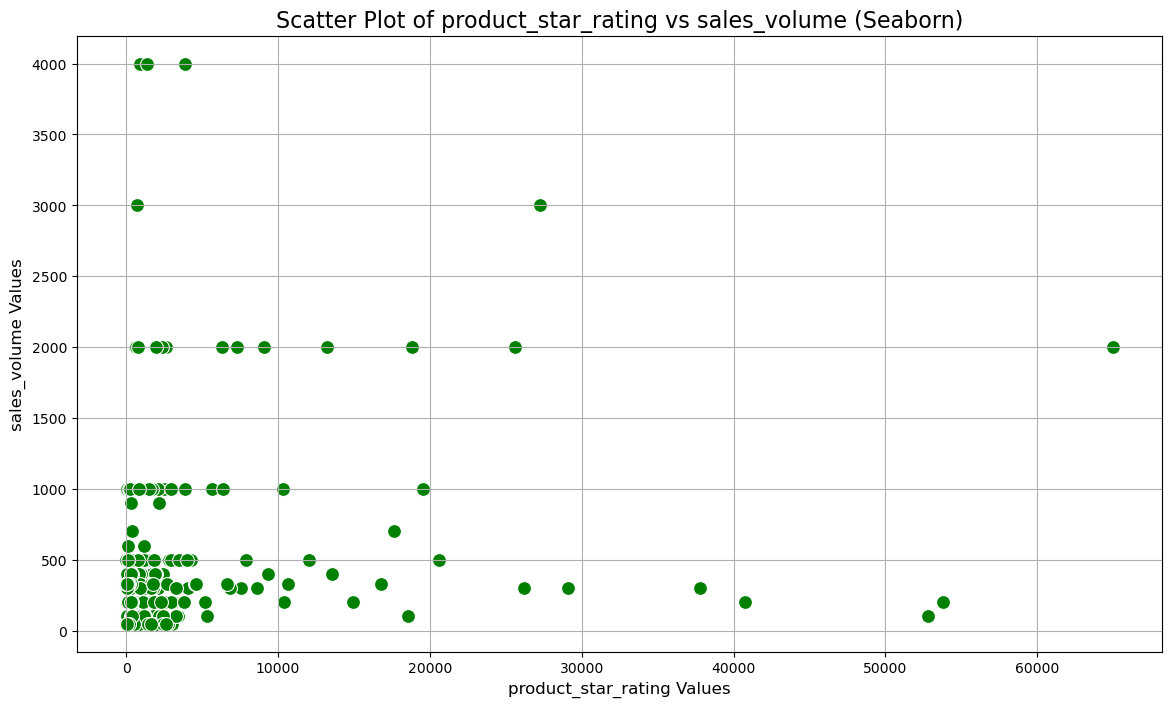

In [176]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x="product_num_ratings", y="sales_volume", data=phonesDF, color="green", s=100)
plt.title("Scatter Plot of product_star_rating vs sales_volume (Seaborn)", fontsize=16)
plt.xlabel("product_star_rating Values", fontsize=12)
plt.ylabel("sales_volume Values", fontsize=12)
plt.grid(True)
plt.show()

In [98]:
# sns.heatmap(mainPhoneDF, annot=True, cmap='Blues',fmt='.2f')

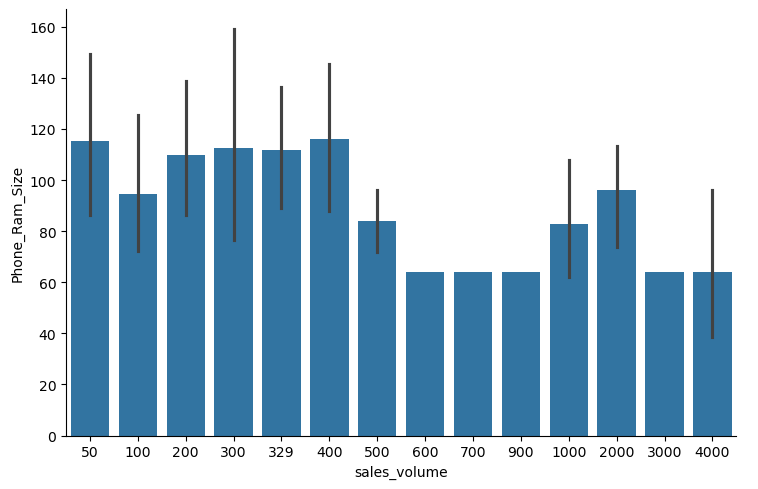

In [180]:
sns.catplot(data=mainPhoneDF, kind='bar', x='sales_volume', y='Phone_Ram_Size', aspect=1.5, dodge=False)

In [ ]:
sns.catplot(data=mainPhoneDF, kind='bar', x='sales_volume', y='product_price', aspect=1.5, dodge=False)

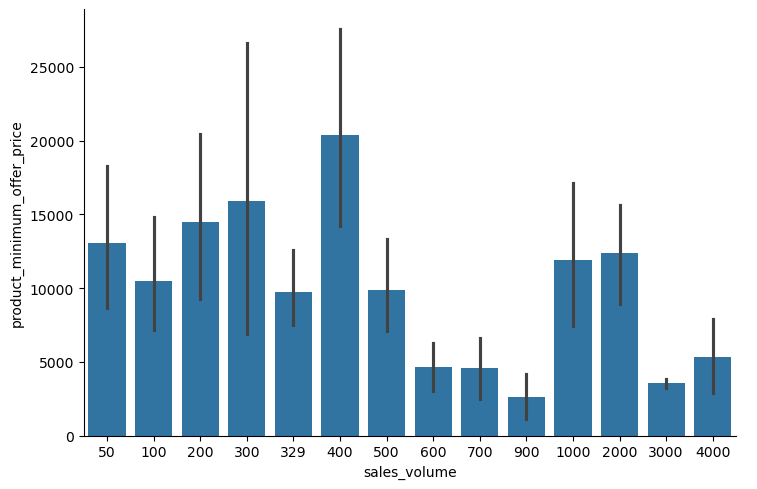

In [64]:
sns.catplot(data=mainPhoneDF, kind='bar', x='sales_volume', y='product_minimum_offer_price', aspect=1.5, dodge=False)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(mainPhoneDF)
scaled_phonesData=scaler.transform(mainPhoneDF)

In [80]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_phonesData)
x_pca=pca.transform(scaled_phonesData)
# x_pca

In [82]:
print(scaled_phonesData.shape)
print(x_pca.shape)

(319, 26)
(319, 2)


In [182]:
x = mainPhoneDF.drop(['sales_volume'], axis=1)
y = mainPhoneDF['sales_volume']

In [86]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [184]:
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rfModel.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
rf_model.score(x_train, y_train)

0.8599988873024391

##### ================================================================= ##### 
                         Using Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
randomForestCalssifier = RandomForestClassifier(n_estimators=180,random_state=10,max_depth=7)
randomForestCalssifier.fit(x_train,y_train)
# y_pred=RandomForestClassifier.predict(x_test)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, y)
# print(clf.predict([[0, 0, 0, 0]]))

RandomForestClassifier(max_depth=7, n_estimators=180, random_state=10)

In [116]:
y_pred=randomForestCalssifier.predict(x_test)
x_test['Actual']=y_test
x_test['Predictations']=y_pred
x_test

,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,...,Moto,Motorola,Nokia,OnePlus,Other_Brands,Panasonic,Samsung,VTech,Actual,Predictations
75,15708,15068,4,64977,22,13103,0,0,0,1,...,0,0,0,0,0,0,0,0,2000,2000
155,21000,15068,4,1968,27,18811,0,0,0,1,...,0,0,0,0,0,0,1,0,400,400
158,23015,15068,3,1574,11,17219,0,0,0,1,...,0,0,0,0,0,0,1,0,200,400
54,17639,20916,3,6272,5,13859,0,0,0,1,...,0,0,0,0,0,0,1,0,2000,200
163,5539,15068,4,26175,3,2961,0,0,1,0,...,0,0,0,0,0,0,0,1,300,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1259,15068,3,60,1,1259,0,0,1,0,...,0,0,1,0,0,0,0,0,500,50
70,29399,33599,4,266,3,26368,0,0,1,1,...,0,0,0,0,0,0,1,0,500,200
41,14027,15068,3,7272,53,11327,0,0,1,1,...,0,0,0,0,0,0,1,0,2000,2000
240,2519,15068,4,25,1,2519,0,0,1,0,...,0,0,0,0,0,0,0,0,300,50


In [ ]:
print(randomForestCalssifier.feature_importances_)

In [126]:
print(randomForestCalssifier.feature_importances_)

[0.12447753 0.11672715 0.03743375 0.16176413 0.13323507 0.14373155
 0.00310255 0.00364055 0.02497349 0.02906113 0.03255215 0.05876523
 0.01244608 0.00890761 0.00265201 0.00543277 0.00688476 0.00951118
 0.01976282 0.00452883 0.00640283 0.01641281 0.00906361 0.02148174
 0.00704866]


In [132]:
imp_feature=pd.Series(randomForestCalssifier.feature_importances_,
                      index = x_train.columns.values[:25]).sort_values(ascending=False)
imp_feature.shape

(25,)

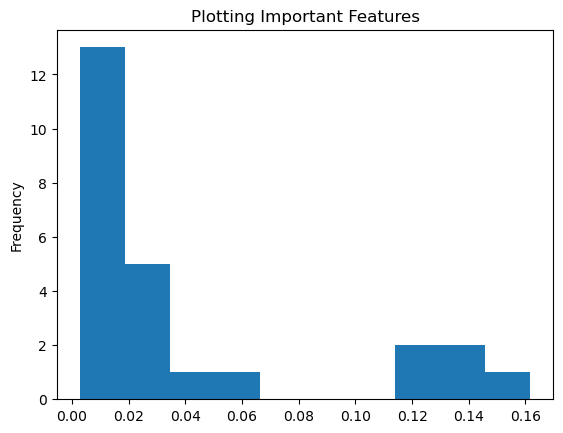

In [134]:
# plotting feature importance
plot = imp_feature.plot(kind='hist', title="Plotting Important Features")